<a href="https://colab.research.google.com/github/solo-karu/Nifty_Forecast/blob/main/Vix_Static_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

India VIX-Based Intraday Forecast Bands for Nifty

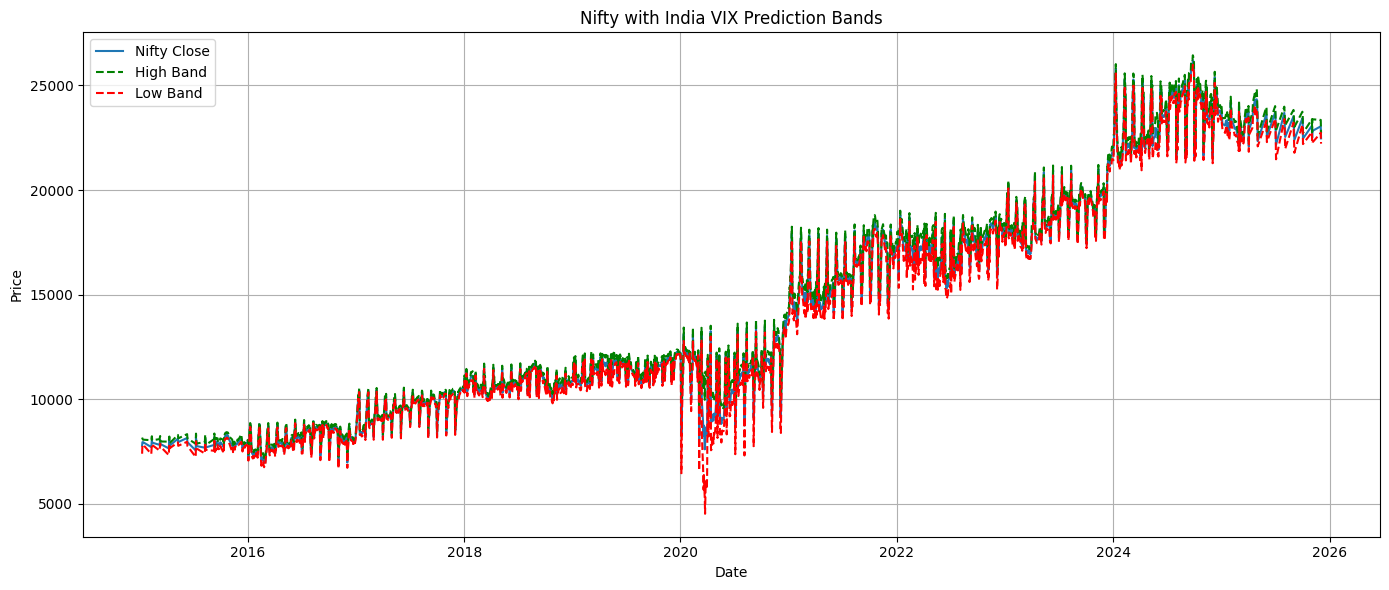

Prediction bands saved to: /content/Nifty_VIX_Predicted_Bands.xlsx


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Forecast Using India Vix-3.xlsx'
df = pd.read_excel(file_path)

# Parse and sort date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate VIX Predicted Move
df['VIX_Predicted_Move_%'] = (df['Price.1'] ** 2) * 0.6 / 100

# Calculate high and low prediction bands
df['Nifty_High_Band'] = df['Price'] * (1 + df['VIX_Predicted_Move_%'] / 100)
df['Nifty_Low_Band'] = df['Price'] * (1 - df['VIX_Predicted_Move_%'] / 100)

# Plotting the data
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label="Nifty Close")
plt.plot(df['Date'], df['Nifty_High_Band'], linestyle='--', color='green', label="High Band")
plt.plot(df['Date'], df['Nifty_Low_Band'], linestyle='--', color='red', label="Low Band")
plt.title("Nifty with India VIX Prediction Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create new DataFrame for export
output_df = df[['Date', 'Price', 'Nifty_High_Band', 'Nifty_Low_Band']]
output_file_path = '/content/Nifty_VIX_Predicted_Bands.xlsx'
output_df.to_excel(output_file_path, index=False)

print(f"Prediction bands saved to: {output_file_path}")
